In [1]:
#4.2 Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('Barley_price-1.csv')
df2 = pd.read_csv('Barley_production-1.csv')

In [4]:
#Collapses barley production data frame to state-year level
df2 = df2[["State", "Year", "Value"]]

In [5]:
#Clean formatting of production values
df2['Value'] = df2['Value'].str.replace(',', '')

In [6]:
#Change string to integer values
df2['Value'] = pd.to_numeric(df2['Value'])

In [7]:
#Divide values by 1 million to represent them in millions
df2['Value'] = df2['Value'] / 1000000

In [8]:
#Rename for clarity
df2 = df2.rename(columns = {'Value':'Production (millions)'})

In [9]:
#Sums production for each state for each year
df2 = df2.groupby(['Year', 'State'], as_index = False)['Production (millions)'].sum()

In [10]:
#Collapses barley price data frame to state-year level
df1 = df1[['Year', 'State', 'Value']]
df1 = df1.rename(columns = {'Value':'Price'})

In [11]:
#Merges barley production data frame with barley price
#Inner merge ensures there is production data for each price,
#However, this omits some price data
df = df2.merge(df1, how = 'inner')

In [12]:
#Uncomment below to download final data set
#df.to_csv('final_dataset.csv')
df

,Year,State,Production (millions),Price
0,1990,ARIZONA,1.575,2.79
1,1990,CALIFORNIA,13.340,2.62
2,1990,COLORADO,12.000,3.06
3,1990,DELAWARE,1.890,1.89
4,1990,IDAHO,56.160,2.62
...,...,...,...,...
606,2017,MONTANA,28.815,4.34
607,2017,NORTH DAKOTA,24.885,4.31
608,2017,VIRGINIA,0.803,2.60
609,2017,WASHINGTON,4.505,3.09


In [13]:
"""The data set provides information on barley prices and quantities produced in various 
U.S. states for every year from 1990 until 2017. The data has been cleaned, but it
originates from data collected by the U.S. Department of Agriculture. Users should be
aware that the data does not include all 50 U.S. states and some years may have more
states represented than others."""

'The data set provides information on barley prices and quantities produced in various \nU.S. states for every year from 1990 until 2017. The data has been cleaned, but it\noriginates from data collected by the U.S. Department of Agriculture. Users should be\naware that the data does not include all 50 U.S. states and some years may have more\nstates represented than others.'

In [14]:

#4.3 Time Series Plot


In [15]:
#Creates new column with prices weighted based on production in duplicate dataframe
df3 = df
df3['wtd_p'] = df3['Production (millions)'] * df3['Price']

In [16]:
#New df with summed weighted prices as well as producion quantities (used as weights) for each year
wtd_av = df3.groupby(['Year'], as_index = False)[['wtd_p', 'Production (millions)']].sum()

In [17]:
#Creates new column with weighted average prices for each year
wtd_av['Weighted Average Price'] = wtd_av['wtd_p'] / wtd_av['Production (millions)']

In [18]:
#Simplifies new data frame
wtd_av = wtd_av[['Year', 'Weighted Average Price']]
wtd_av.head()

,Year,Weighted Average Price
0,1990,2.159061
1,1991,2.146205
2,1992,2.079725
3,1993,2.042221
4,1994,2.090659


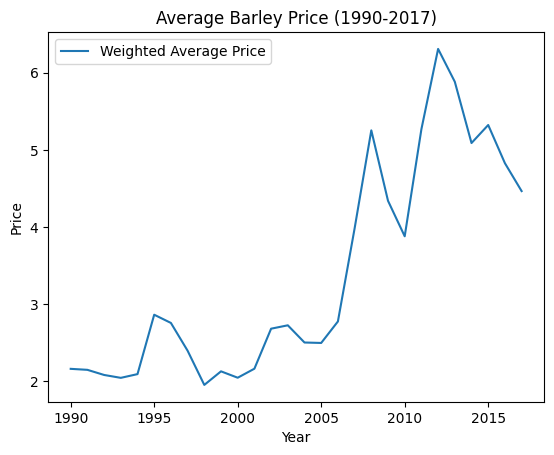

In [19]:
wtd_av.plot(x= 'Year', y = 'Weighted Average Price')
plt.title("Average Barley Price (1990-2017)")
plt.ylabel("Price")

#Uncomment to download
#plt.savefig('Avg_Price_Graph.png')

plt.show()

In [20]:
"""After plotting the data for barley prices over time, there is a clear upwards trend.
That is, prices for barley face an upward trend and appear to be rising over time. There
have also been many fluctuations in the price. Notably, in 2008 there was a big drop 
correlating with the great recession and another drop around 2012. Even though, prices seem
to vary and in 2017 prices were declining, the general trend seems to be upward."""

'After plotting the data for barley prices over time, there is a clear upwards trend.\nThat is, prices for barley face an upward trend and appear to be rising over time. There\nhave also been many fluctuations in the price. Notably, in 2008 there was a big drop \ncorrelating with the great recession and another drop around 2012. Even though, prices seem\nto vary and in 2017 prices were declining, the general trend seems to be upward.'

In [21]:

#4.4 Summary Table


In [22]:
#Creates new table with mean production values in the 90s
table90s = df.query('(Year >= 1990) and (Year <= 1999)' )
table90s = table90s.groupby(['State'], as_index = False)['Production (millions)'].mean()
table90s = table90s.rename(columns = {'Production (millions)':'1990-1999'})

In [23]:
#Mean production table for the 2000s decade
table2000s = df.query('(Year >= 2000) and (Year <= 2009)' )
table2000s = table2000s.groupby(['State'], as_index = False)['Production (millions)'].mean()
table2000s = table2000s.rename(columns = {'Production (millions)':'2000-2009'})

In [24]:
#Mean production table for the 2010s decade
table10s = df.query('(Year >= 2010) and (Year <= 2017)' )
table10s = table10s.groupby(['State'], as_index = False)['Production (millions)'].mean()
table10s = table10s.rename(columns = {'Production (millions)':'2010-2017'})

In [25]:
#Merges three tables together
table = table90s.merge(table2000s, how = 'left')
table = table.merge(table10s, how = 'left')
table = table.round(4)

In [26]:
#Returns table with specified states
table = table.query('State == ["IDAHO", "MINNESOTA", "MONTANA", "NORTH DAKOTA", "WYOMING"]')

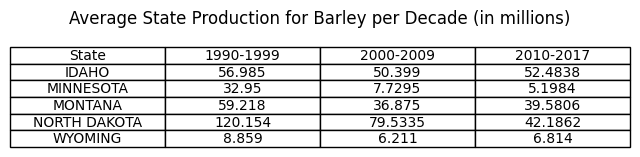

In [27]:
#Creates formatted table for final product
fig = plt.figure(figsize = (8, .2))
ax = fig.add_subplot(111)

ax.table(cellText = table.values, colLabels = table.columns,
         cellLoc = 'center')

ax.set_title('Average State Production for Barley per Decade (in millions)')
ax.axis('off')
plt.show()

In [28]:


#5. Short Answer



In [29]:
#pip install linearmodels
from linearmodels import PanelOLS

In [30]:
df = df.rename(columns = {'Production (millions)':'Production'})


In [31]:
#Creates panel data for state each year
df = df.set_index(['State', 'Year'])
df = df.groupby(['State', 'Year'])[['Production', 'Price']].sum()
df

Production  Price
State   Year                   
ARIZONA 1990       1.575   2.79
        1991       2.400   2.60
        1992       2.205   2.60
        1993       2.900   2.60
        1994       3.135   2.85
...                  ...    ...
WYOMING 2013       6.052   6.71
        2014       7.276   5.98
        2015       8.170   5.99
        2016       7.872   5.54
        2017       6.426   4.70

[611 rows x 2 columns]

In [32]:
#5.2: Calculates OLS regression with white standard errors
Y = df['Production']
df['const'] = 1
dd = ['const', 'Price']
difdif = PanelOLS(Y, df[dd]).fit(cov_type = 'robust')
print(difdif)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Production   R-squared:                        0.0135
Estimator:                   PanelOLS   R-squared (Between):              0.0575
No. Observations:                 611   R-squared (Within):              -0.2029
Date:                Sat, Jan 11 2025   R-squared (Overall):              0.0135
Time:                        17:52:42   Log-likelihood                   -2774.2
Cov. Estimator:                Robust                                           
                                        F-statistic:                      8.3057
Entities:                          28   P-value                           0.0041
Avg Obs:                       21.821   Distribution:                   F(1,609)
Min Obs:                       9.0000                                           
Max Obs:                       28.000   F-statistic (robust):             9.0347
                            

In [33]:
#5.4: Calculates regression with state fixed effects using clustered standard errors at the state level
stateFE = PanelOLS(Y, df[dd], entity_effects = True)
print(stateFE.fit(cov_type = 'clustered', cluster_entity = True, cluster_time = False, group_debias = True))

                          PanelOLS Estimation Summary                           
Dep. Variable:             Production   R-squared:                        0.1134
Estimator:                   PanelOLS   R-squared (Between):             -0.1529
No. Observations:                 611   R-squared (Within):               0.1134
Date:                Sat, Jan 11 2025   R-squared (Overall):             -0.0701
Time:                        17:52:42   Log-likelihood                   -2221.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      74.437
Entities:                          28   P-value                           0.0000
Avg Obs:                       21.821   Distribution:                   F(1,582)
Min Obs:                       9.0000                                           
Max Obs:                       28.000   F-statistic (robust):             5.0167
                            

In [34]:
#Calculates regression with state and year fixed effects using clustered standard error for both
st_yrFE = PanelOLS(Y, df[dd], entity_effects = True, time_effects = True)
print(st_yrFE.fit(cov_type = 'clustered', cluster_entity = True, cluster_time = True, group_debias = True))

                          PanelOLS Estimation Summary                           
Dep. Variable:             Production   R-squared:                        0.0586
Estimator:                   PanelOLS   R-squared (Between):             -0.2707
No. Observations:                 611   R-squared (Within):               0.0510
Date:                Sat, Jan 11 2025   R-squared (Overall):             -0.1609
Time:                        17:52:43   Log-likelihood                   -2169.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.530
Entities:                          28   P-value                           0.0000
Avg Obs:                       21.821   Distribution:                   F(1,555)
Min Obs:                       9.0000                                           
Max Obs:                       28.000   F-statistic (robust):             2.0075
                            

In [35]:
df = df.drop(columns = 'const')

#Uncomment to download panel style data
#df.to_csv('Panel_Dataset.csv')
df

Production  Price
State   Year                   
ARIZONA 1990       1.575   2.79
        1991       2.400   2.60
        1992       2.205   2.60
        1993       2.900   2.60
        1994       3.135   2.85
...                  ...    ...
WYOMING 2013       6.052   6.71
        2014       7.276   5.98
        2015       8.170   5.99
        2016       7.872   5.54
        2017       6.426   4.70

[611 rows x 2 columns]